In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from plotnine import *


sns.set_theme()


In [2]:
galton_families = sm.datasets.get_rdataset("GaltonFamilies", package="HistData")
galton_families.data

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


In [3]:
fathers_sons = galton_families.data[galton_families.data['gender'] == 'male']
fathers_sons

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
4,002,75.5,66.5,73.66,4,1,male,73.5
5,002,75.5,66.5,73.66,4,2,male,72.5
8,003,75.0,64.0,72.06,2,1,male,71.0
10,004,75.0,64.0,72.06,5,1,male,70.5
...,...,...,...,...,...,...,...,...
918,199,64.0,64.0,66.56,7,2,male,68.0
924,200,64.0,63.0,66.02,1,1,male,64.5
925,201,64.0,60.0,64.40,2,1,male,66.0
929,203,62.0,66.0,66.64,3,1,male,64.0


In [4]:
pearsonr = stats.pearsonr(x = fathers_sons.father, y = fathers_sons.childHeight)
pearsonr

PearsonRResult(statistic=0.3923834966628357, pvalue=3.737108856193614e-19)

In [5]:
fathers_sons_mod = smf.ols("childHeight ~ father", data=fathers_sons)
fathers_sons_res = fathers_sons_mod.fit()
fathers_sons_res.params

Intercept    38.362581
father        0.446523
dtype: float64

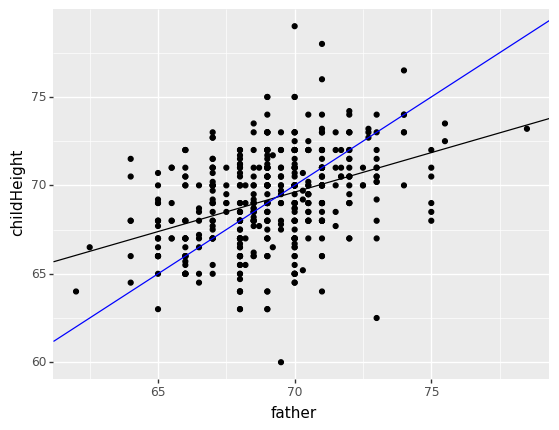

<ggplot: (8778611706591)>

In [6]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x="father", y="childHeight")) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], slope=fathers_sons_res.params['father']) +\
    geom_abline(intercept=0, slope=1, color='blue')

In [7]:
sns.lmplot(x='father', y='childHeight', data=fathers_sons, aspect=1.5)


In [8]:
fathers_sons_res.fittedvalues

0      73.414606
4      72.075038
5      72.075038
8      71.851776
10     71.851776
         ...    
918    66.940028
924    66.940028
925    66.940028
929    66.046983
932    66.270244
Length: 481, dtype: float64

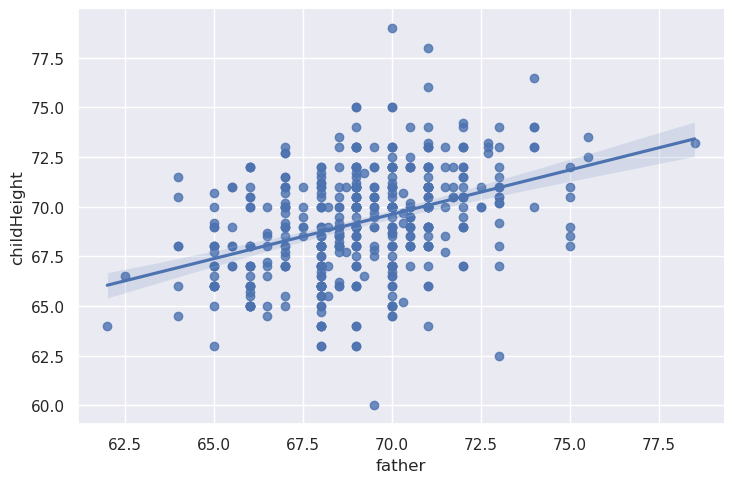

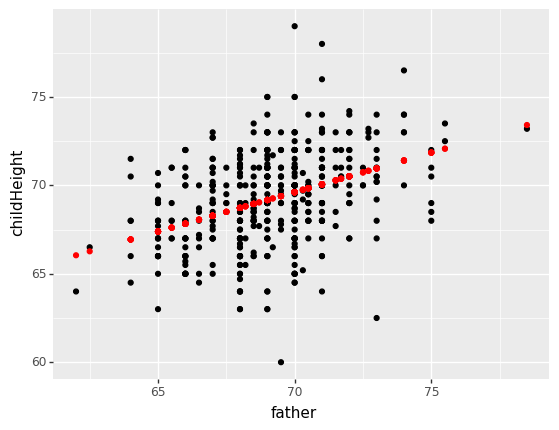

<ggplot: (8778611900061)>

In [9]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x="father", y="childHeight")) +\
    geom_point(mapping=aes(x="father",y="fathers_sons_res.fittedvalues"), color="red")

In [16]:
fathers_sons_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     87.17
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           3.74e-19
Time:                        11:00:50   Log-Likelihood:                -1105.8
No. Observations:                 481   AIC:                             2216.
Df Residuals:                     479   BIC:                             2224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.3626      3.308     11.596      0.000      31.862      44.863
father         0.4465      0.048      9.337      0.000       0.353       0.540
==============================================================================
Omnibus:                        8.610   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               12.731
Skew:                          -0.110   Prob(JB):                      0.00172
Kurtosis:                       3.766   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
fathers_sons_res.fittedvalues

0      73.414606
4      72.075038
5      72.075038
8      71.851776
10     71.851776
         ...    
918    66.940028
924    66.940028
925    66.940028
929    66.046983
932    66.270244
Length: 481, dtype: float64

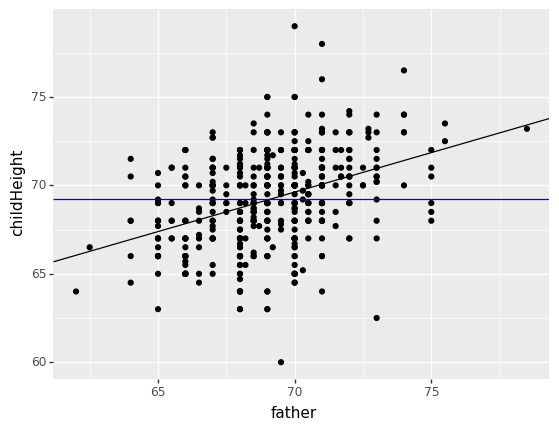

<ggplot: (8778611816921)>

In [11]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x="father", y="childHeight")) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], slope=fathers_sons_res.params['father']) +\
    geom_abline(intercept=fathers_sons.childHeight.mean(), slope=0, color='blue')

In [12]:
np.isclose(fathers_sons_res.rsquared, pearsonr[0]**2)

True

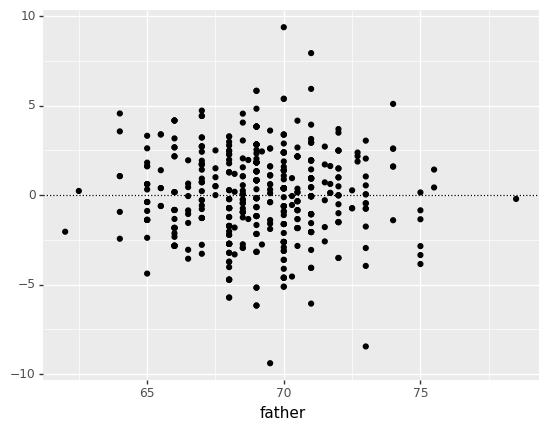

<ggplot: (8778611819018)>

In [13]:
ggplot(data=fathers_sons) +\
    geom_hline(yintercept=0, color="black", linetype="dotted") +\
    geom_point(mapping=aes(x=fathers_sons['father'], y=fathers_sons_res.resid ))

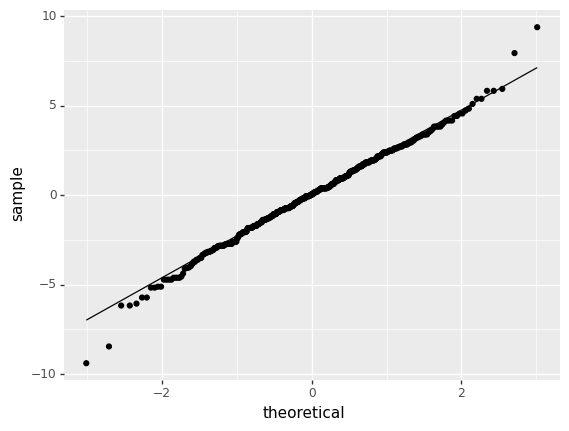

<ggplot: (8778611828429)>

In [14]:
ggplot(data=fathers_sons_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))


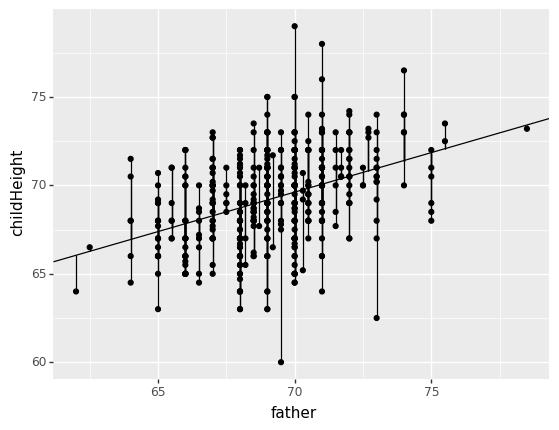

<ggplot: (8778607399458)>

In [19]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y="childHeight")) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], slope=fathers_sons_res.params['father']) +\
    geom_linerange(mapping=aes(x='father', ymin=fathers_sons_res.fittedvalues, ymax='childHeight'))
